# Police Killings
As part of a DataQuest guided project, a dataset prepared by the Guardian and shared by FiveThirtyEight regarding citizens killed by police in the United States was downloaded and explored. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

police_killings = pd.read_csv('police_killings.csv', encoding='latin1')

police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


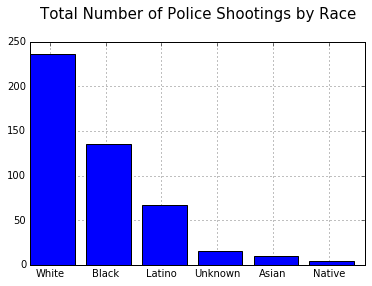

In [3]:
# Count how many times each race appears in the data set
count_by_race = police_killings['raceethnicity'].value_counts()


# This plot shows total number of people killed by race
plt.grid(zorder=0)
plt.bar(range(6), count_by_race, zorder=3)
plt.title("Total Number of Police Shootings by Race", 
         fontsize=15, y=1.08)
race_labels = ['White', 'Black', 'Latino', 'Unknown', 'Asian', 'Native']
plt.xticks(np.arange(0,6,1)+0.35, race_labels)
plt.show()

This graph shows the total number of citizens killed by police in the United States by race. Whites account for the greatest number of citizens killed but are also the racial demographic with the largest population. It would be more interesting to see a comparison between the percentage of the population for which each race group represents and their percent share of police killings.

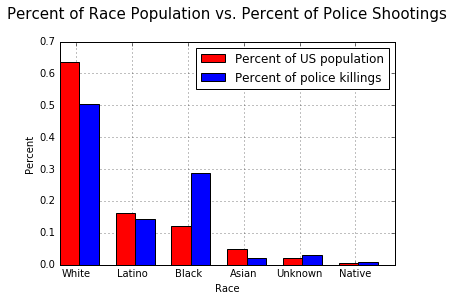

In [4]:
# https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race_and_ethnicity
us_race_demo = {'Asian/Pacific Islander': 0.049,
                'Black': 0.122,
                'Hispanic/Latino': 0.163 ,
                'Native American': 0.007,
                'Unknown': 0.022,
                'White': 0.637}

# Creating a pd Series and sorting to prep for a DataFrame                
race_demo_ser = pd.Series(us_race_demo)
race_demo_ser = race_demo_ser.sort_index()
percent_of_killings = count_by_race / sum(count_by_race)
percent_of_killings = percent_of_killings.sort_index()

# Combining the Series, sorting new DataFrame by Demography
percentages = pd.concat([percent_of_killings, race_demo_ser], axis=1)
percentages.columns = ['Percent Killed', 'Demography']
percentages = percentages.sort_values(by='Demography', ascending=False)
races = percentages.index.tolist()

# Plotting the graph
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

offset = np.arange(6) + 0.35
plt.grid(zorder=0)
bar1 = ax1.bar(range(6), percentages['Demography'], width=0.35, color='red', zorder=3)
bar2 = ax2.bar(offset, percentages['Percent Killed'], width=0.35, zorder=3)
plt.title("Percent of Race Population vs. Percent of Police Shootings", 
         fontsize=15, y=1.08)
plt.xlabel('Race')
plt.ylabel('Percent')
xlabels = ["White", "Latino", "Black", "Asian", "Unknown", "Native"]
plt.xticks(np.arange(0.30,6.30, 1), xlabels, rotation= 0)
plt.legend((bar1, bar2), ('Percent of US population', 'Percent of police killings'), loc='upper right')

plt.show()

This graph is far more revealing. We can see that whites account for roughly 63% of the American population yet only make up 50% of those killed by police. Blacks are disproportionately over-represented with over double the amount of citizens killed by police in comparsion to their share of the American population. 

While the disparity in representation between whites and blacks is shocking, it is not surprising given the United States' history of institutional racism. Going forward, we will further examine areas in which differences in power in socioeconomic terms may manifest itself. We will start by comparing whites and blacks by the median personal income for the census tract where the person-killed lived. 

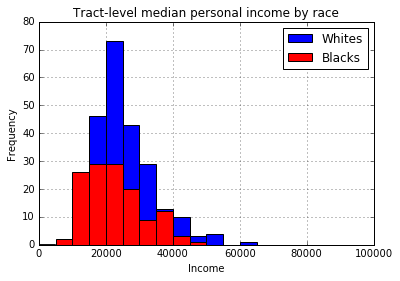

Black Tract-Level Median Income:  21008.0
White Tract-Level Median Income:  23525.0


In [5]:
# Get income data. Create a dataframe that does not contain strings. 
income = police_killings[police_killings['p_income'] != '-']


income.is_copy = False # Avoid SettingWithCopyWarning
income['p_income'] = income['p_income'].astype(int)

#plt.hist(income['p_income'], bins=np.arange(0,100000,5000))
black_income = income['p_income'][income['raceethnicity'] == 'Black']
black_income.sort_values(inplace=True, ascending=True)
black_income = black_income[1:-1]
white_income = income['p_income'][income['raceethnicity'] == 'White']

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

bar1 = ax1.hist(white_income, bins=np.arange(0,100000,5000), label='Whites', zorder=3)
bar2 = ax2.hist(black_income, bins=np.arange(0,100000,5000), label='Blacks', color='red',zorder=3)
plt.grid(zorder=0)
plt.title('Tract-level median personal income by race')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend( loc='upper right')
plt.show()

print("Black Tract-Level Median Income: " , np.median(black_income))
print("White Tract-Level Median Income: " , np.median(white_income))


The histogram for white median incomes has a leptokurtic shape while the histogram for black incomes is somewhat platykurtic. No significance testing was done as a part of this guided project but it would be interesting to see if there is a statistical difference between the two groups. 

Next, we will look at the racial demography of the states in which these these incidents occurred. We will begin by finding the top and bottom 10 states in terms of police killing rate.

In [6]:
# Read in demography data set, count killings by state code and combine the datasets
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "killings": counts})
states.reset_index(drop=True, inplace=True)
states = states.merge(state_pop, how='left', on='STATE', copy=False)

# Setting index to the name of the states
states.set_index("NAME", inplace=True)

# Create a rate statistic showing police killing per million people
states['pop_millions'] = states['POPESTIMATE2015'] /1000000
states['rate'] = states['killings'] / states['pop_millions']

top_ten = states['rate'].sort_values(ascending=False)
bottom_ten = states['rate'].sort_values(ascending=True)

print('Ten most violent states')
print(top_ten[0:10])
print('\n')
print('Ten least violent states')
print(bottom_ten[0:10])

Ten most violent states
NAME
Oklahoma      5.624674
Arizona       3.661359
Nebraska      3.164240
Hawaii        2.794071
Alaska        2.708442
Idaho         2.417021
New Mexico    2.397956
Louisiana     2.355095
Colorado      2.199182
Delaware      2.114312
Name: rate, dtype: float64


Ten least violent states
NAME
Connecticut      0.278483
Pennsylvania     0.546768
Iowa             0.640226
New York         0.656705
Massachusetts    0.735898
New Hampshire    0.751536
Maine            0.752260
Illinois         0.855366
Ohio             0.861073
Wisconsin        0.866350
Name: rate, dtype: float64


Now that we've isolated the most and least violent states in terms of police killings, we will look at the average tract population, county median income, and the tract-level percent share of whites, blacks, and hispanics in the ten most and least police-violent states.

In [7]:
# Creating a new Dataframe just containing the shares of whites, blacks, and hispanics
pk = police_killings[
                (police_killings['share_white'] != '-') &
                (police_killings['share_black'] != '-') &
                (police_killings['share_hispanic'] != '-')]
pk.is_copy = False
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)


# The top ten states, high and low, have been grouped by their FP codes.
highest_rates = [40, 4, 31, 15, 2, 16, 35, 22, 8, 10]
lowest_rates = [55, 39, 17, 23, 33, 25, 36, 19, 42, 9]

# Creating DataFrames for entries with states in one of the top tens
lowest_states = pk[pk.state_fp.isin(lowest_rates)]
highest_states = pk[pk.state_fp.isin(highest_rates)]               
print('States with the low police killing rates')
print(lowest_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())
print('\n')
print('States with the highest police killing rates')
print(highest_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())


States with the low police killing rates
pop                4153.472727
county_income     55037.963636
share_white          60.132727
share_black          21.610909
share_hispanic       12.994545
dtype: float64


States with the highest police killing rates
pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64


By grouping the highest and lowest police violence states and calculating the average share of citizens by race, we see that there is a pretty significant difference in the representation of black citizens between these two groups of states. This is where the guided project ended and it left us with some interesting questions. For instance, this data seems to suggest that when there are fewer black citizens in a community, there is a loss of political and social power that may protect them from fatal actions prepetrated by racist police officers. However, as seen previously, there are more whites killed in total by police and the above tables do not examine where members of each race are being killed. It just looks at where police have killed citizens. It would be interesting in the future to examine what the average demography is when the data has been split by race.